In [1]:
%load_ext tikzmagic

# 13 Specifying Coordinates

## 좌표 표시

* 괄호안에 좌표 표시 혹은 좌표 이름

```
(좌표 표시)
```



## 좌표계

* 캔버스 좌표계
* XYZ 좌표계
* 캔버스 극 좌표계
* XY 극 좌표계
* 상대 좌표계
* 회전 좌표계
* 노드 좌표계
* 질량중심 좌표계
* 직교 좌표계
* 교점 좌표계
* 계산 좌표계

## 캔버스 좌표계

* 길이 2개 (단위가 있어야 함)

```
(길이, 길이)
```

또는 

```
(길이 연산식, 길이 연산식)
```

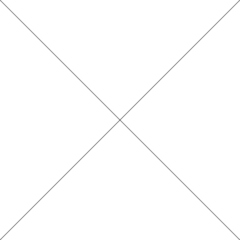

In [2]:
%%tikz

\draw (0cm, 0cm) -- (10cm, 10cm);

\def\x{5cm}
\def\y{2}

\draw (0cm+1cm-1cm, 11cm+\y cm+\y cm-\x) -- (\y * 1 * \x, 0 * \y / \x); 

## xyz 좌표계

* 숫자 2개 또는 숫자 3개 
* 단위가 없어야 함
* 1번째 좌표는 (10mm, 0) x-벡터
* 2번째 좌표는 (0, 10mm) y-벡터
* 3번째 좌표는 (-3.85mm, -3.85mm) z-벡터
* x, y, z-벡터는 변경가능
* `x=길이` 또는 `x={(길이, 길이)}`

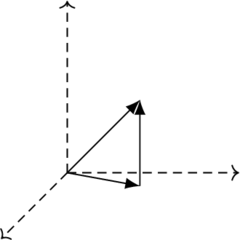

In [3]:
%%tikz -l arrows.meta

\draw[->,densely dashed] (0,0) -- (2,0);
\draw[->,densely dashed] (0,0) -- (0,2);
\draw[->,densely dashed] (0,0) -- (0,0,2);

\def\z{0.4}
\draw[-Latex] (0,0) -- (1,0,\z);
\draw[-Latex] (0,0) -- (1,1,\z);
\draw[-Latex] (1,0,\z) -- (1,1,\z);


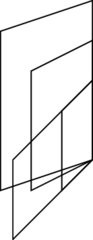

In [4]:
%%tikz 

\draw (0,0,0) -- (0,0,1) -- (0,1,1) -- (0,1,0) -- cycle;
\draw[y=1.5cm,z={(2*-3.85mm, -3.85mm)}] (0,0,0) -- (0,0,1) -- (0,1,1) -- (0,1,0) -- cycle;
\draw[y=2.0cm,z={(3*-3.85mm, -3.85mm)}] (0,0,0) -- (0,0,1) -- (0,1,1) -- (0,1,0) -- cycle;
\draw[z=-1cm] (0,0,0) -- (0,0,1) -- (0,1,1) -- (0,1,0) -- cycle;

## 극 좌표계

* `(각도:길이)`(캔버스 극 좌표계) 또는 `(각도:숫자)`(xy 극 좌표계)
* 각도 단위는 도(degree)
* 0도가 시계바늘 3시

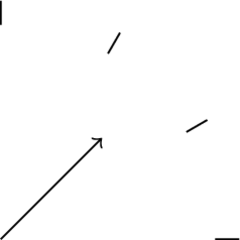

In [5]:
%%tikz

\def\radius{2cm}
\def\tick{0.2cm}

\draw (0:\radius-\tick) -- (0:\radius);
\draw (30:\radius-\tick) -- (30:\radius);
\draw (60:\radius-\tick) -- (60:\radius);
\draw (90:\radius-\tick) -- (90:\radius);
\draw[->] (45:0) -- (45:0.6 * \radius);

## 상대 좌표계

* `+(좌표)`: 기준점으로부터 상대적 좌표. 기준점은 변하지 않음
* `++(좌표)`: 기준점으로부터 상대적 좌표. 기준점이 현재 좌표로 변함
* 기준점은 상황에 따라 바뀜. `.. controls (좌표1) and (좌표2) ..`에서 좌표2의 기준점은 뒤의 좌표

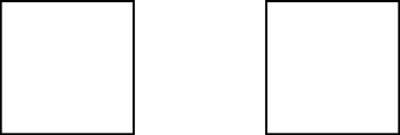

In [6]:
%%tikz

\draw (0,0) -- +(1,0) -- +(1,1) -- +(0,1) -- cycle;
\draw (2,0) -- ++(1,0) -- ++(0,1) -- ++(-1,0) -- cycle;

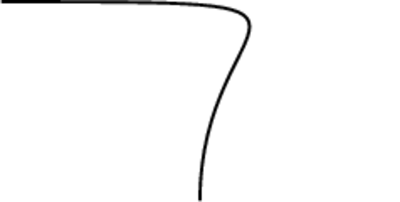

In [7]:
%%tikz

\draw (0,1) .. controls +(0:2) and +(90:1) .. (1,0);

## 회전 좌표계

* `([turn]회전각도:거리)` 또는 `([turn]숫자,숫자)`
* 경로 마지막 점이 원점이고 경로의 마지막 진행 방향이 기준 각도 0도

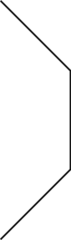

In [8]:
%%tikz

\draw (0,0) -- (45:1) -- ([turn]45:1) -- ([turn]45:1) ;

## 노드 좌표계

* (노드명.각도) 또는 (노드명.앵커)

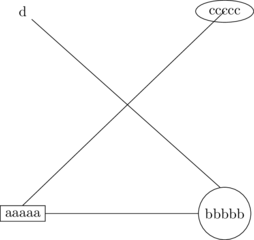

In [9]:
%%tikz -l shapes

\node[rectangle,draw] (a) at (0,0) {aaaaa};
\node[circle,draw] (b) at (5,0) {bbbbb};
\node[ellipse,draw] (c) at (5,5) {ccccc};
\node (d) at (0,5) {d};

\draw (a.90) -- (c.center);
\draw (a.east) -- (b.180);
\draw (d) -- (b.100);

## 질량중심 좌표계

* `(barycentric cs:<노드명>=숫자)`
* 숫자를 가중치로 하는 노드의 가중평균

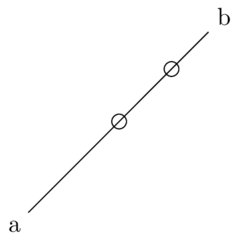

In [10]:
%%tikz

\node (a) at (0,0) {a};
\node (b) at (3,3) {b};
\draw (a) -- (b);

\tikzset{radius=3pt};
\draw (barycentric cs:a=1,b=1) circle ;
\draw (barycentric cs:a=1,b=3) circle ;

## 직교 좌표계

* `(노드명 |- 노드명)`
* `(노드명 -| 노드명)`

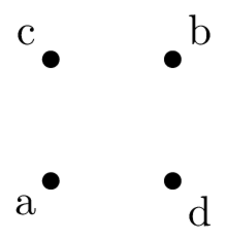

In [11]:
%%tikz

\coordinate (a) at (0,0);
\coordinate (b) at (1,1);

\fill (a) circle (2pt) node[below left] {a};
\fill (b) circle (2pt) node[above right] {b};
\fill (a |- b) circle (2pt) node[above left] {c};
\fill (a -| b) circle (2pt) node[below right] {d};


## 교점 좌표계

* `intersections` 라이브러리 사용
* `name path=경로이름`로 2개의 경로 지정
* `name intersections={of 경로이름1 and 경로이름2}`로 교점 지점
* 교점의 이름은 `intersection-1`, `intersection-2` ...

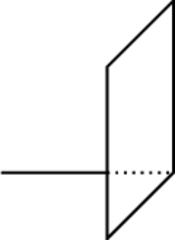

In [12]:
%%tikz -l intersections

\path[name path=path 1] (0,0) -- (0.9,0);
\draw[name path=path 2] (1,0) -- ++(0,0,1) -- ++(0,1,0) -- ++(0,0,-1) -- cycle;
\path[name intersections={of=path 1 and path 2}];
\draw(0,0) -- (intersection-1);
\draw[densely dotted] (intersection-1) -- (1,0);

## 계산 좌표계

* `calc` 라이브러리 사용
* `($ 노드 계산식 $)`
* `(좌표1) !숫자! 각도: (좌표2)`: 숫자는 좌표1과 좌표2 사이의 위치 (0=좌표1, 1=좌표2). 좌표1 기준으로 회전
* `(좌표1) !거리! 각도: (좌표2)`: 거리는 좌표1부터 좌표2 방향의 겨리. 좌표1 기준으로 회전
* `(좌표1) !(좌표3)! 각도: (좌표2)`: 좌표1과 좌표2 사이에 좌표3이 투영된 위치. 좌표3 기준으로 회전

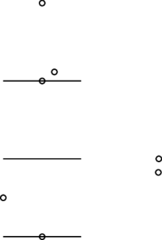

In [13]:
%%tikz -l calc

\draw (0,0) -- (1,0);
\draw ($(0,0)!0.5!(1,0)$) circle (1pt);
\draw ($(0,0)!0.5! 90: (1,0)$) circle (1pt);

\draw (0,1) -- (1, 1);
\draw ($(0,1)!2cm!(1,1)$) circle (1pt);
\draw ($(0,1)!2cm! -5: (1,1)$) circle (1pt);

\draw (0,2) -- (1, 2);
\draw (0.5,3) circle (1pt);
\draw ($(0,2)!(0.5,3)!(1,2)$) circle (1pt);
\draw ($(0,2)!(0.5,3)! 10: (1,2)$) circle (1pt);
